# Simulation of defaced vs original manual ratings

Simulate 12 raters each rating 580 original images. The ratings are randomly sampled from {1,2,3,4} and randomly distributed across subjects. To introduce a bias in the ratings of defaced images, we add +1 to a predefined precentage of the ratings on original images. The percentage of scan affected varies between raters. 

In [54]:
set.seed(1234)

n_rated <- 522 #nbr of subjects rated per rater
#n_rated <- 130 #nbr of subjects rated per rater
n_sub <- 580 #nbr of subjects available in the dataset
n_rater <- 12 #nbr of raters

manual_original <- matrix(, nrow = n_sub, ncol = n_rater)
manual_defaced <- matrix(, nrow = n_sub, ncol = n_rater)

#Define for each rater the percentage of biased ratings
perc_biased <- c(2,10,10,30,40,40,50,50,60,70,90,90)
for (i in 1:n_rater) {
    #Each rater rates subjects picked at random
    ind_sub <- sample(1:n_sub, n_rated, replace = F)
    #random original ratings sampled from {1,2,3,4}
    ratings <- sample(1:4, n_rated, replace = T)
    manual_original[ind_sub, i] <- ratings
    
    #To simulate a positive bias towards defaced data, we improve the ratings of a 
    #predefined percentage of the original scans
    ind_rat <- sample(1:n_rated, round(n_rated*perc_biased[i]/100), replace = F)
    ratings_biased <- ratings
    ratings_biased[ind_rat] <- ratings_biased[ind_rat] + 1
    #The scale stops at 4 so clip higher values to 4 
    ratings_biased[ratings_biased == 5] <- 4
    
    #Set the biased ratings as the ratings on the defaced condition
    manual_defaced[ind_sub, i] <- ratings_biased
}

manual_original_vec <- c(manual_original)
manual_defaced_vec <- c(manual_defaced)
                  
defaced <- rep(c(0, 1), times = n_rater*n_sub)
sub <- rep(rep(1:n_sub, each=2), times = n_rater)
rater <- rep(1:n_rater, each=n_sub*2)

#Convert to dataframe to use in regression
df <- data.frame(sub = sub)
df$defaced <- factor(defaced, levels = 0:1, labels = c("original", "defaced"))
df$rater <- factor(rater, levels = 1:12, labels = c("rater01", "rater02","rater03","rater04","rater05","rater06","rater07","rater08","rater09","rater10","rater11","rater12"))
df$ratings <- factor(c(rbind(manual_original_vec, manual_defaced_vec)), levels = 1:4, labels = c("excluded", "poor", "good", "excellent"))

#Write dataframe to file
saveRDS(df,file="SimulatedData/SimulatedDefacedRatings_10%Missing.Rda")

## Plot ratings distribution

To verify that a bias is visible in the data, we plot for each rater the ratings distribution differentially for the defaced vs original conditions.

In [45]:
## Create dataframe with frequency counts
df_small <- data.frame(rater = df$rater, ratings = df$ratings, defaced =df$defaced)
conTable <- table(df_small)
df_freq <- as.data.frame(conTable)
df_freq

rater,ratings,defaced,Freq
<fct>,<fct>,<fct>,<int>
rater01,excluded,original,139
rater02,excluded,original,152
rater03,excluded,original,152
rater04,excluded,original,151
rater05,excluded,original,138
rater06,excluded,original,145
rater07,excluded,original,159
rater08,excluded,original,140
rater09,excluded,original,152


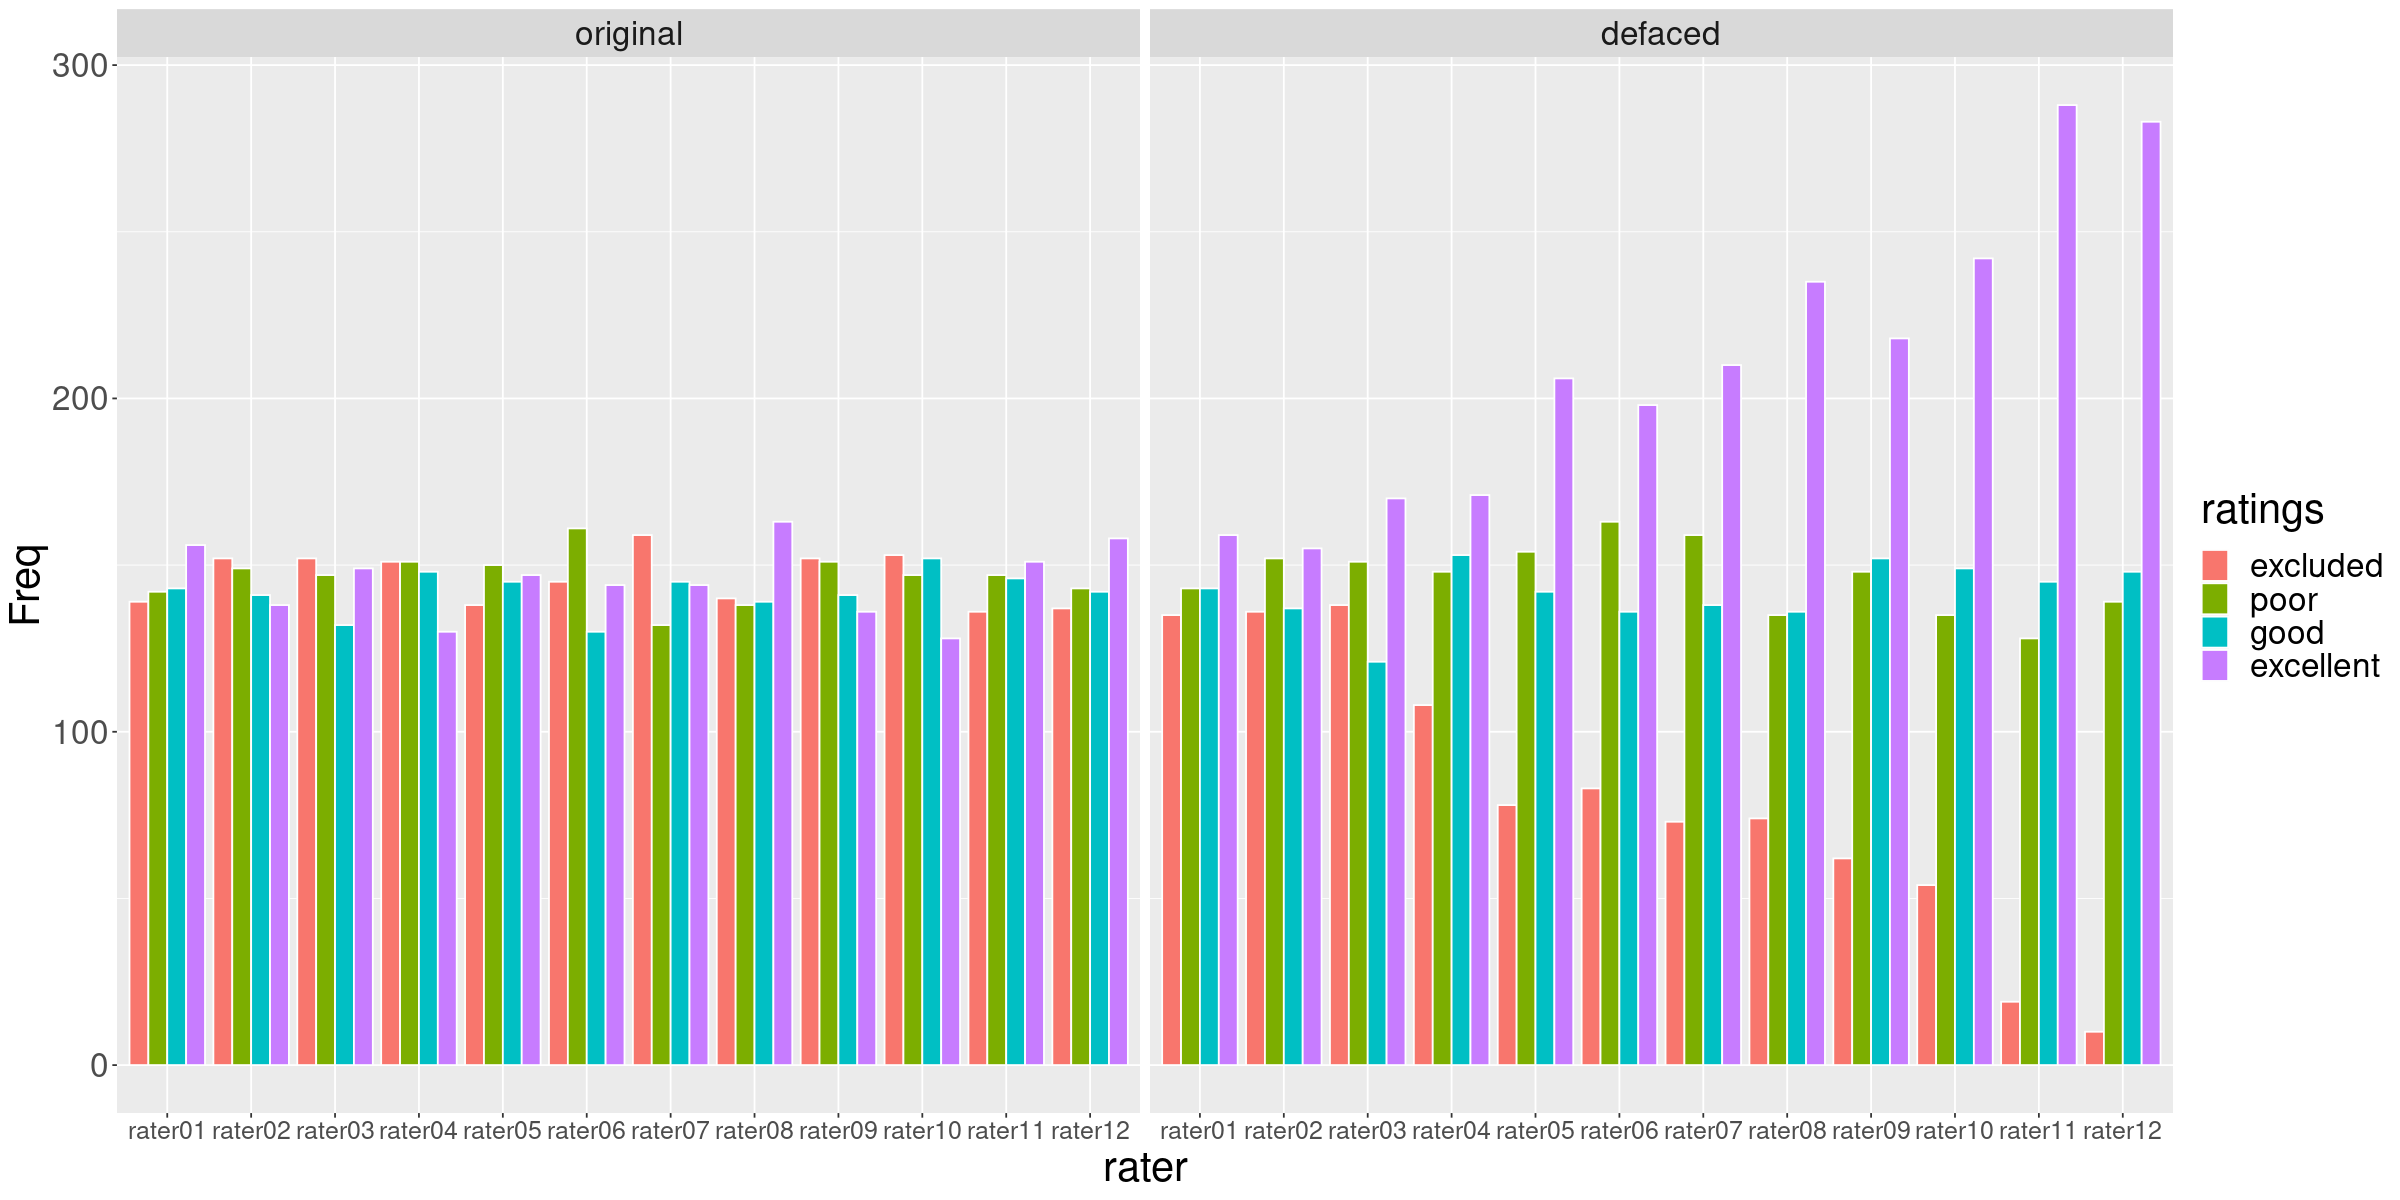

In [44]:
## Bar plot
ggplot(df_freq, aes(x = rater, y = Freq))+
  geom_bar(
    aes(fill = ratings), stat = "identity", color = "white",
    position = position_dodge(0.9) 
    )+
  facet_wrap(~defaced)+
  theme(text = element_text(size = 25))+
  theme(axis.text.x = element_text(size = 15))

## Other plots attempt

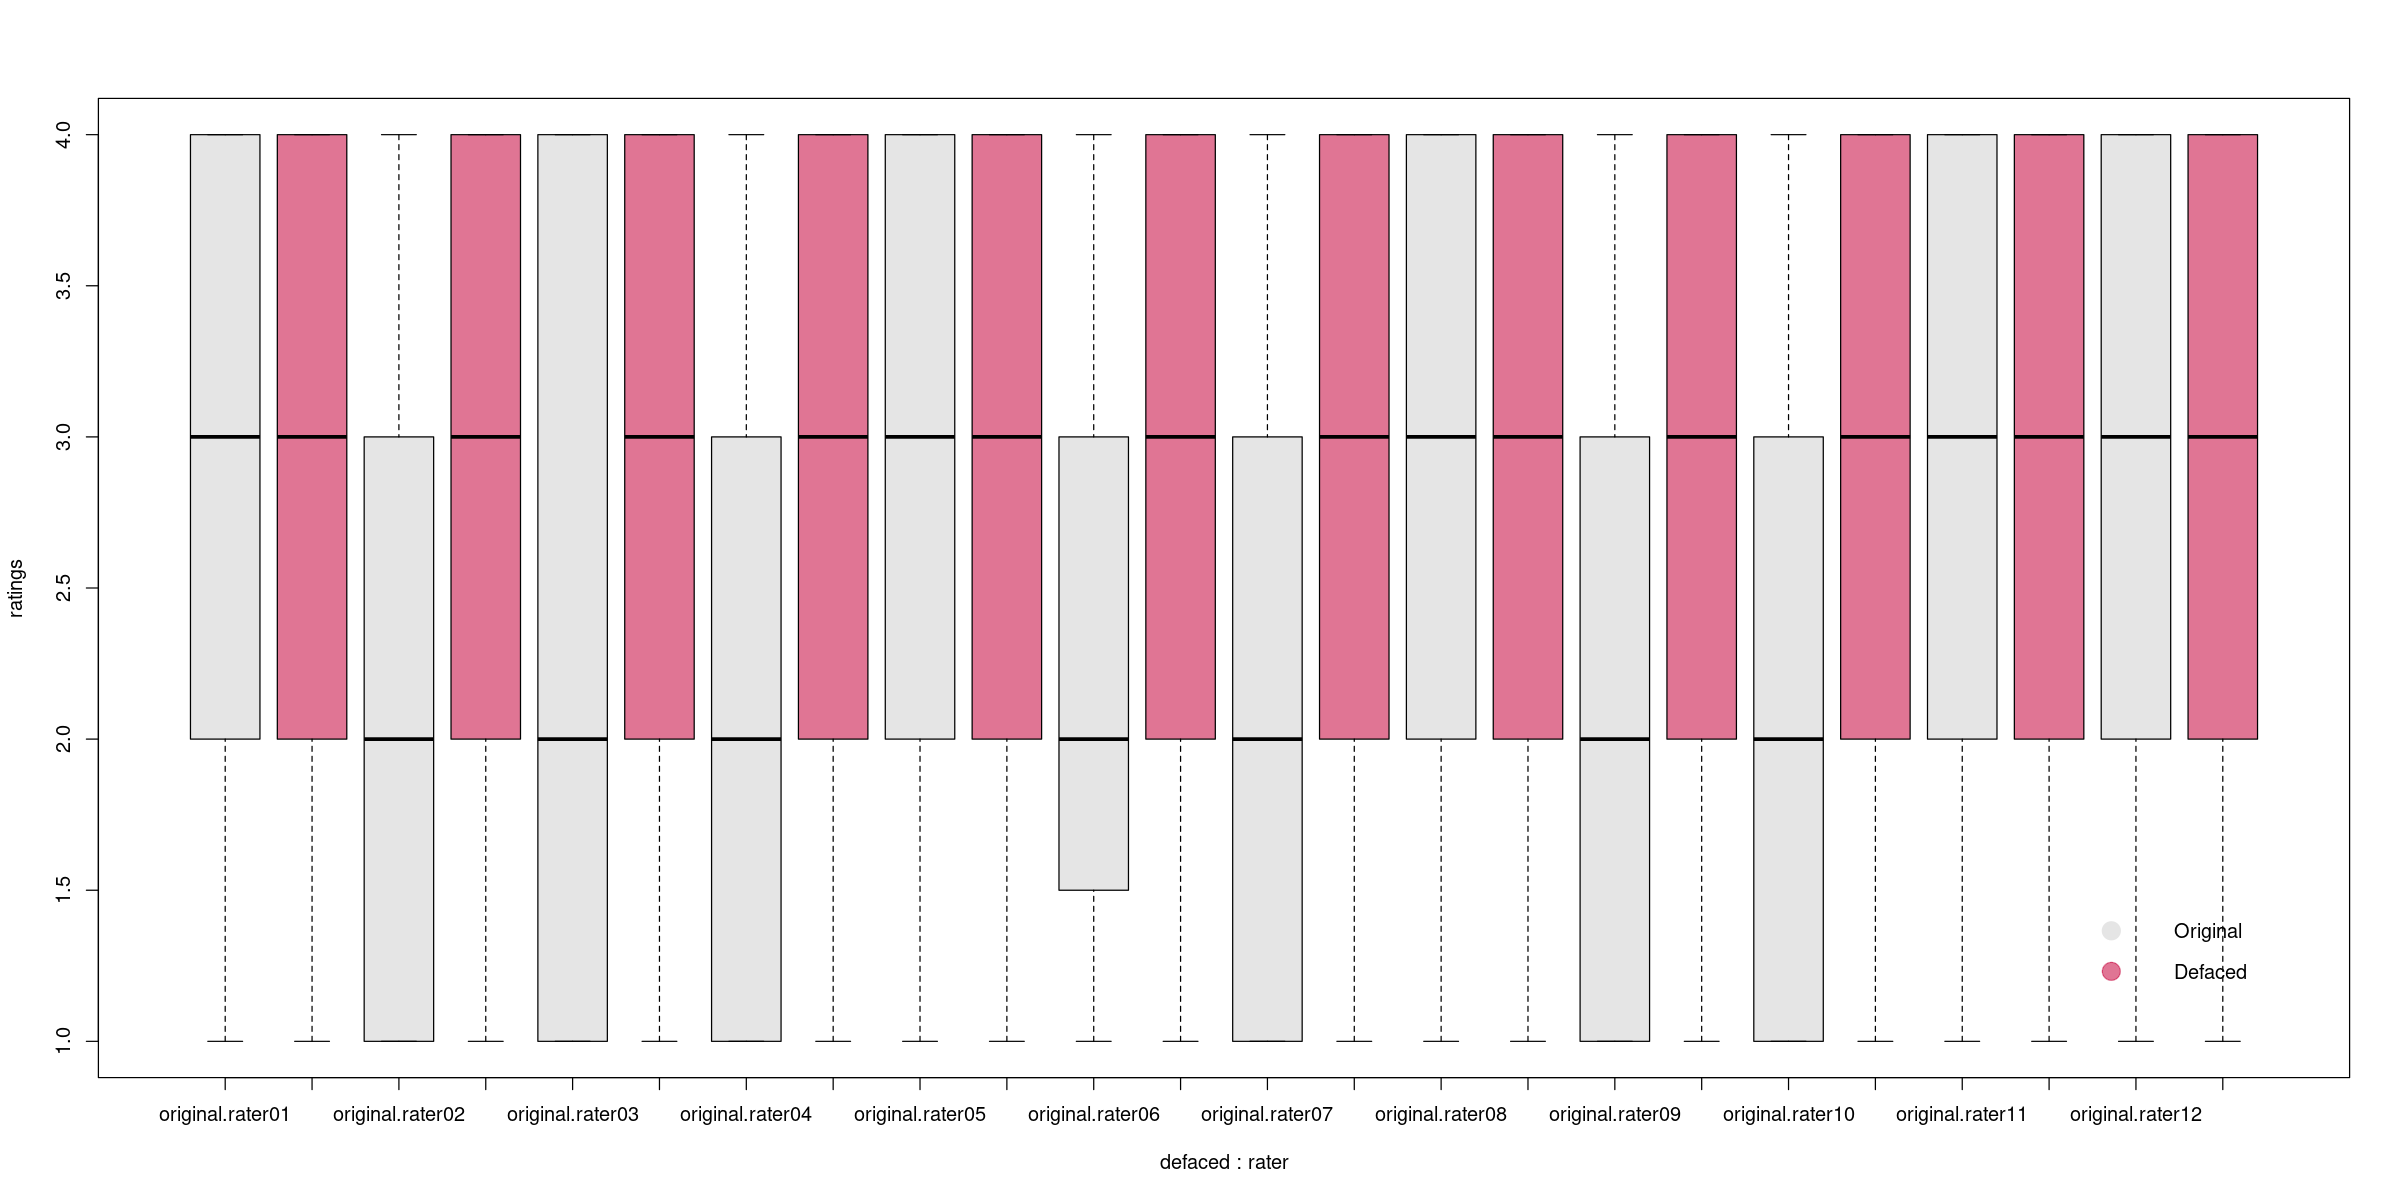

In [7]:
## Boxplot
#change size of displayed plot
library(repr)
options(repr.plot.width=20, repr.plot.height=10)

#create color vector
myColors <- ifelse(levels(df$defaced)=="defaced" , rgb(0.8,0.1,0.3,0.6) , 
              ifelse(levels(df$defaced)=="original", "grey90",
              "grey90" ) )

boxplot(ratings~defaced+rater, data=df, col=myColors)

#Add legend
legend(22,1.5, legend = c("Original","Defaced") , bg='lightblue',
    col = c('grey90', rgb(0.8,0.1,0.3,0.6)) , bty = "n", pch=20 , pt.cex = 3, 
    cex = 1, horiz = FALSE, inset = c(0.03, 0.1), box.lty=1)

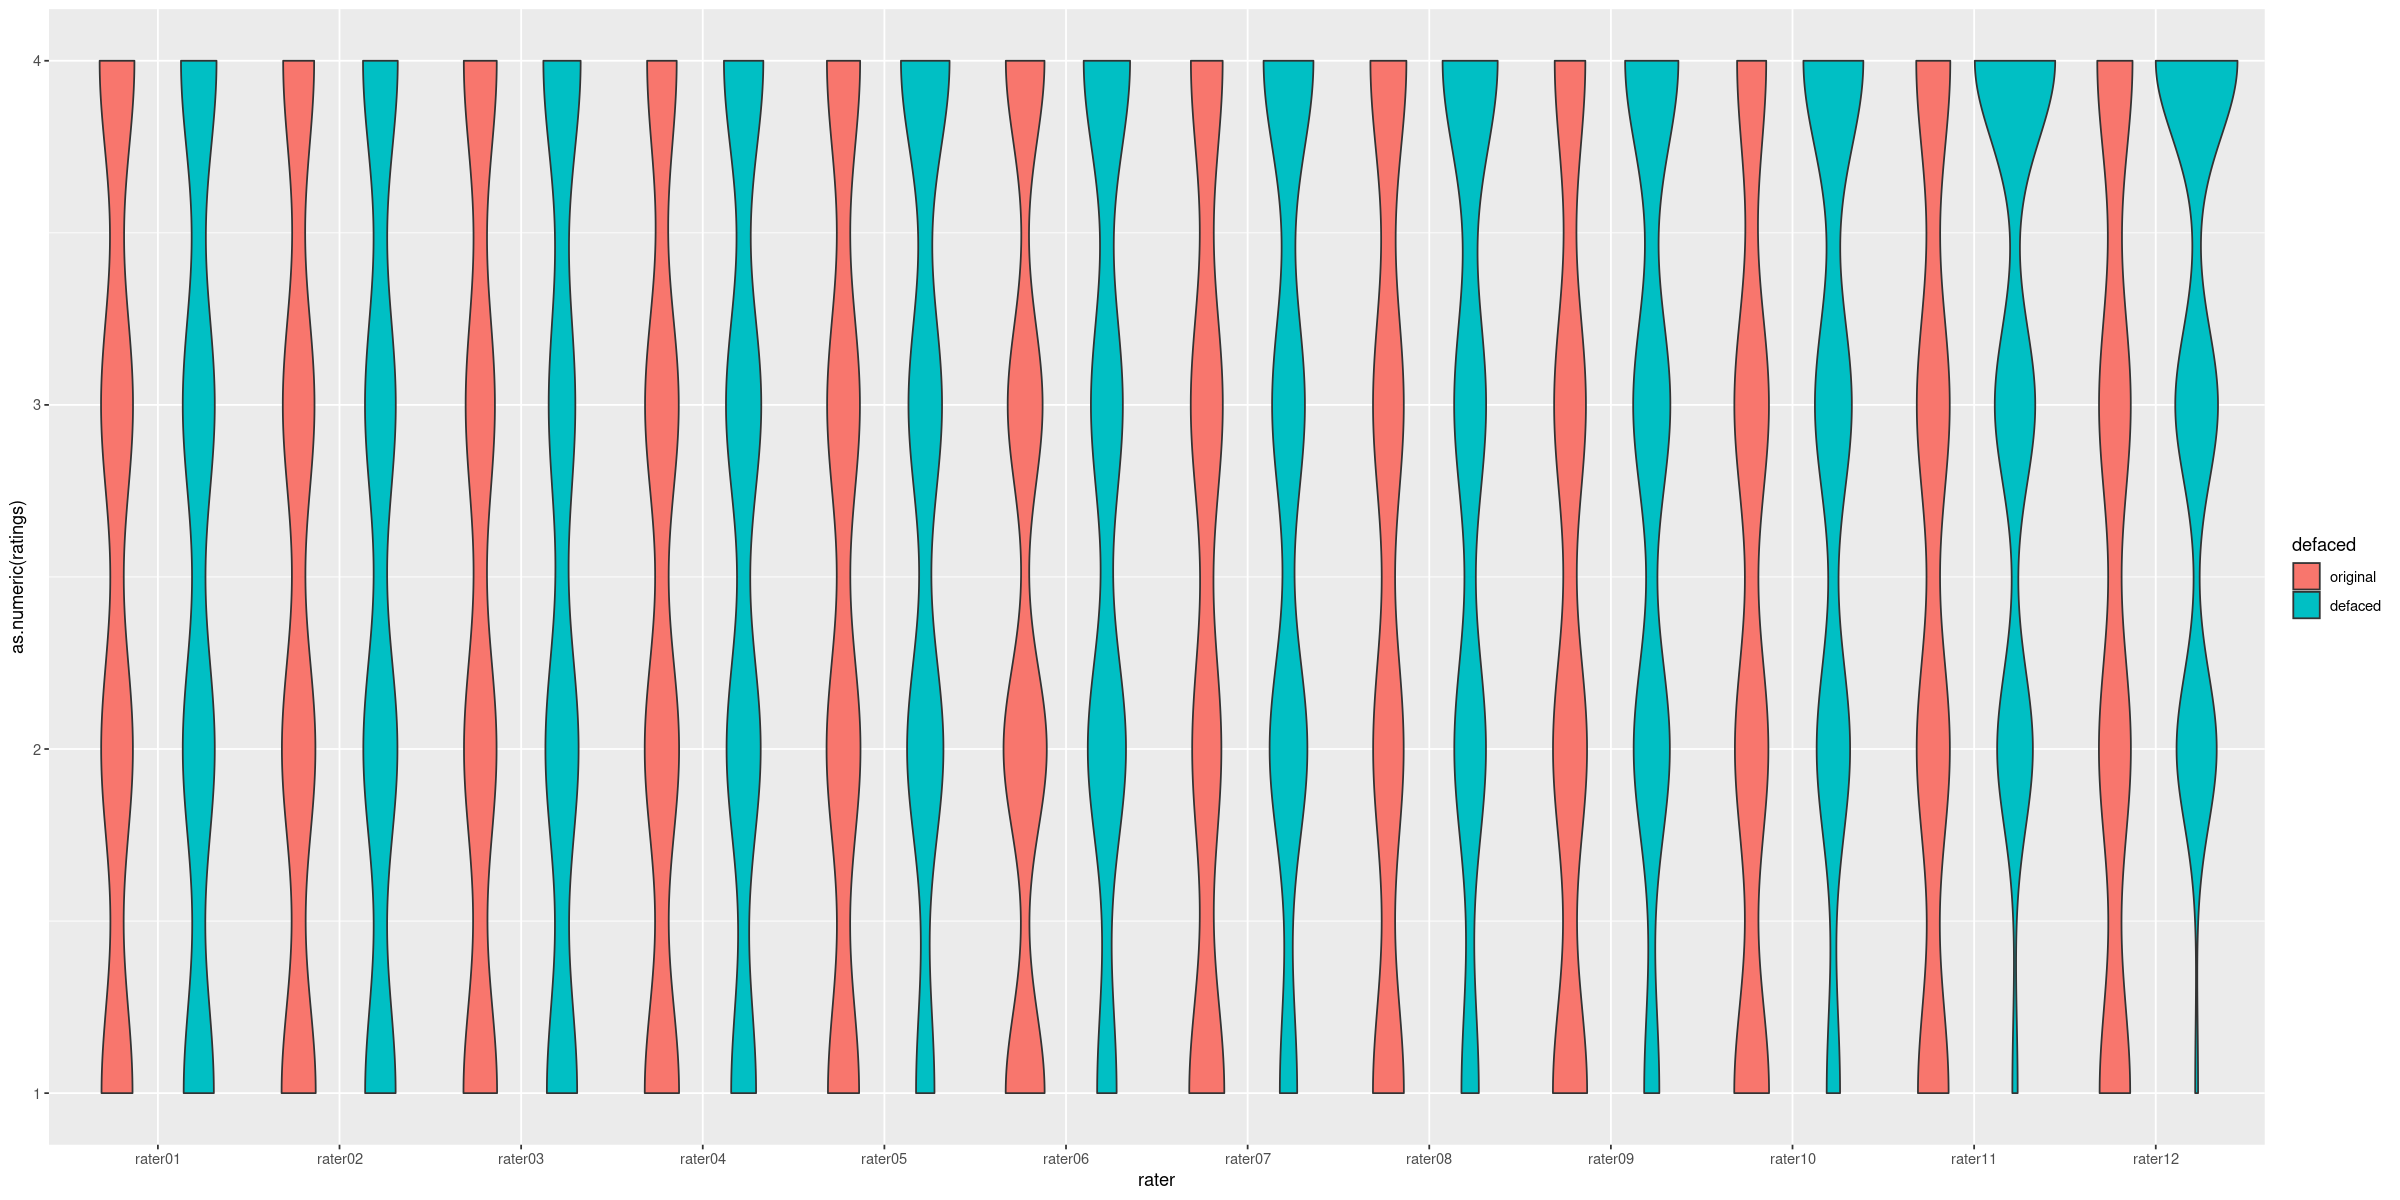

In [8]:
## Violinplot
library(ggplot2)
p <- ggplot(df, aes(x=rater, y=as.numeric(ratings), fill=defaced)) + geom_violin()
p

In [22]:
## Balloon plot
library(ggplot2)
ggballoonplot(df_freq, x = "rater", y = "ratings", size = "Freq",
              fill = "Freq", facet.by = "defaced",
              ggtheme = theme_bw()) +
  scale_fill_viridis_c(option = "C")

ERROR: Error in ggballoonplot(df_freq, x = "rater", y = "freq", size = "Freq", : could not find function "ggballoonplot"
